In [1]:
#dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
# Store filepath in a variable
csv_path = "Resources/Life_Expectancy.csv"

# Source of CSV file
# https://www.kaggle.com/kumarajarshi/life-expectancy-who/version/1

In [3]:
#READ IN CSV
life_exp = pd.read_csv(csv_path, encoding="utf-8")
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
#United States test

usa = life_exp.loc[life_exp['Country'] =="United States of America"]
renamed_usa = usa.rename(columns={"Life expectancy":"Life_Expectancy", "Adult Mortality":"Adult_Mortality"})
renamed_usa.head()


,Country,Year,Status,Life expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2794,United States of America,2015,Developed,79.3,13.0,23,NaN,0.0,92.0,188,...,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2795,United States of America,2014,Developed,79.1,14.0,23,8.82,0.0,92.0,667,...,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2796,United States of America,2013,Developed,78.9,16.0,23,8.82,0.0,91.0,187,...,93.0,16.90,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2797,United States of America,2012,Developed,78.8,16.0,24,8.82,0.0,9.0,55,...,93.0,17.20,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2798,United States of America,2011,Developed,78.7,16.0,25,8.67,0.0,91.0,220,...,94.0,17.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


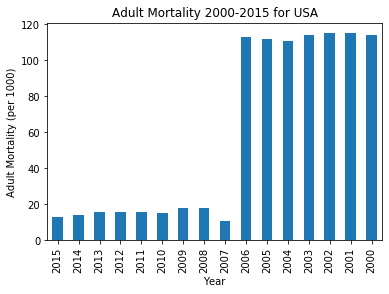

In [5]:
#USA bar to show year versus adult mortality

renamed_usa.plot(x="Year", y="Adult_Mortality", kind='bar', legend=False)
plt.title("Adult Mortality 2000-2015 for USA")
plt.xlabel("Year")
plt.ylabel("Adult Mortality (per 1000)")
plt.show()

#What happened in 2007 for this drop?

In [8]:
year_2015 = life_exp.loc[life_exp['Year'] ==2015]
year_2015.columns = year_2015.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
year_2015

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


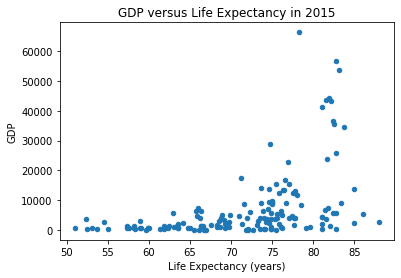

In [11]:
#scatter to show GDP versus life expectancy in 2015

year_2015.plot(x="life_expectancy", y="gdp", kind='scatter', legend=False)
plt.title("GDP versus Life Expectancy in 2015")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("GDP")
plt.show()

In [12]:
year_2015.count()

country                            183
year                               183
status                             183
life_expectancy                    183
adult_mortality                    183
infant_deaths                      183
alcohol                              6
percentage_expenditure             183
hepatitis_b                        174
measles                            183
bmi                                181
under-five_deaths                  183
polio                              183
total_expenditure                    2
diphtheria                         183
hiv/aids                           183
gdp                                154
population                         142
thinness__1-19_years               181
thinness_5-9_years                 181
income_composition_of_resources    173
schooling                          173
dtype: int64

In [14]:
#drop alcohol, total_expenditure

year_2015.dropna(subset=['alcohol', 'total_expenditure'])
year_2015

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


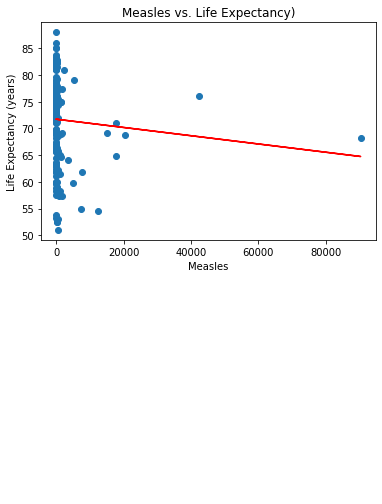

The r-squared is: -0.07461651782605935


In [15]:
x_values = year_2015['measles']
y_values = year_2015['life_expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=1,color="red")
plt.title("Measles vs. Life Expectancy)")
plt.xlabel("Measles")
plt.ylabel("Life Expectancy (years)")
plt.show()

print(f"The r-squared is: {rvalue}")